In [1]:
# %% [markdown]
# # 07 - Technical Indicators Comparison
# ## Advanced Indicator Analysis & Strategy Testing
#
# **Analysis:** Indicator correlation, Signal accuracy, Performance metrics

In [2]:
import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

✅ Configuration loaded for Task 2 - Technical Analysis
📊 Analyzing 6 companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
📈 Technical indicators configured: 10 parameters


In [3]:
# CELL 1: Setup and Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configuration
TICKERS = ["AAPL", "AMZN", "GOOG", "META", "MSFT", "NVDA"]
TECHNICAL_DIR = "../data/processed/technical_indicators"

# Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
company_colors = {'AAPL': '#A2AAAD', 'AMZN': '#FF9900', 'GOOG': '#4285F4', 
                  'META': '#1877F2', 'MSFT': '#737373', 'NVDA': '#76B900'}

print("🔧 Technical Indicators Comparison Analysis")
print(f"📊 Analyzing: {TICKERS}")

🔧 Technical Indicators Comparison Analysis
📊 Analyzing: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


In [4]:
# CELL 2: Load and Prepare Data
technical_file = os.path.join(TECHNICAL_DIR, "technical_indicators.csv")

if not os.path.exists(technical_file):
    print(f"❌ File not found: {technical_file}")
    print("💡 Please run technical analysis first: python scripts/run_technical.py")
else:
    df = pd.read_csv(technical_file)
    df['Date'] = pd.to_datetime(df['Date'])
    print(f"✅ Data loaded: {len(df)} records")
    print(f"📅 Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
    
    # Display available indicators
    indicator_cols = [col for col in df.columns if col not in ['Date', 'Stock', 'Open', 'High', 'Low', 'Close', 'Volume']]
    print(f"📈 Available indicators: {len(indicator_cols)}")
    print(indicator_cols)
    
    display(df.head(3))

✅ Data loaded: 3012 records
📅 Date range: 2023-11-22 to 2025-11-21
📈 Available indicators: 11
['Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Histogram', 'BB_Middle', 'BB_Upper', 'BB_Lower']


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Stock,MA_20,MA_50,RSI,MACD,MACD_Signal,MACD_Histogram,BB_Middle,BB_Upper,BB_Lower
0,2023-11-22 00:00:00-05:00,189.698527,191.125042,189.044697,189.520203,39617700,0.0,0.0,AAPL,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,2023-11-24 00:00:00-05:00,189.084308,189.114026,187.479469,188.192734,24048300,0.0,0.0,AAPL,NaN,NaN,NaN,-0.029783,-0.016546,-0.013237,NaN,NaN,NaN
2,2023-11-27 00:00:00-05:00,188.143193,188.886176,187.132731,188.014404,40552600,0.0,0.0,AAPL,NaN,NaN,NaN,-0.043479,-0.027584,-0.015895,NaN,NaN,NaN


In [5]:
# CELL 3: Current Indicator Values Comparison
print("🎯 CURRENT INDICATOR VALUES COMPARISON")
print("=" * 60)

# Get latest values for each stock
latest_data = []
for ticker in TICKERS:
    stock_data = df[df['Stock'] == ticker].sort_values('Date')
    if not stock_data.empty:
        latest = stock_data.iloc[-1]
        latest_data.append({
            'Stock': ticker,
            'Price': latest['Close'],
            'Price_Change_1D': stock_data['Close'].pct_change().iloc[-1] * 100,
            'RSI': latest.get('RSI', None),
            'MACD': latest.get('MACD', None),
            'MACD_Signal': latest.get('MACD_Signal', None),
            'MA_20': latest.get('MA_20', None),
            'MA_50': latest.get('MA_50', None),
            'BB_Upper': latest.get('BB_Upper', None),
            'BB_Lower': latest.get('BB_Lower', None),
            'Volume_Ratio': latest.get('Volume_Ratio', None),
            'Stoch_K': latest.get('Stoch_K', None)
        })

latest_df = pd.DataFrame(latest_data)

# Format the display
formatted_df = latest_df.copy()
for col in ['Price_Change_1D', 'RSI', 'MACD', 'MACD_Signal', 'Volume_Ratio', 'Stoch_K']:
    if col in formatted_df.columns:
        formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2f}" if pd.notnull(x) else "N/A")

print("Current Technical Readings:")
display(formatted_df)

🎯 CURRENT INDICATOR VALUES COMPARISON
Current Technical Readings:


,Stock,Price,Price_Change_1D,RSI,MACD,MACD_Signal,MA_20,MA_50,BB_Upper,BB_Lower,Volume_Ratio,Stoch_K
0,AAPL,271.489990,1.97,55.14,3.18,4.23,269.942412,259.289082,274.438517,265.446306,N/A,N/A
1,AMZN,220.690002,1.63,19.48,-1.18,2.20,236.224001,227.767400,259.515939,212.932062,N/A,N/A
2,GOOG,299.649994,3.33,60.25,9.24,9.22,283.412999,262.982600,298.836531,267.989467,N/A,N/A
3,META,594.250000,0.87,27.90,-32.45,-30.75,638.550006,697.610687,743.454679,533.645333,N/A,N/A
4,MSFT,472.119995,-1.32,24.54,-8.69,-4.80,507.608408,511.957788,544.066995,471.149820,N/A,N/A
5,NVDA,178.880005,-0.97,29.46,-1.51,0.65,192.949502,186.460401,210.012282,175.886721,N/A,N/A


📊 RSI COMPARISON ACROSS STOCKS


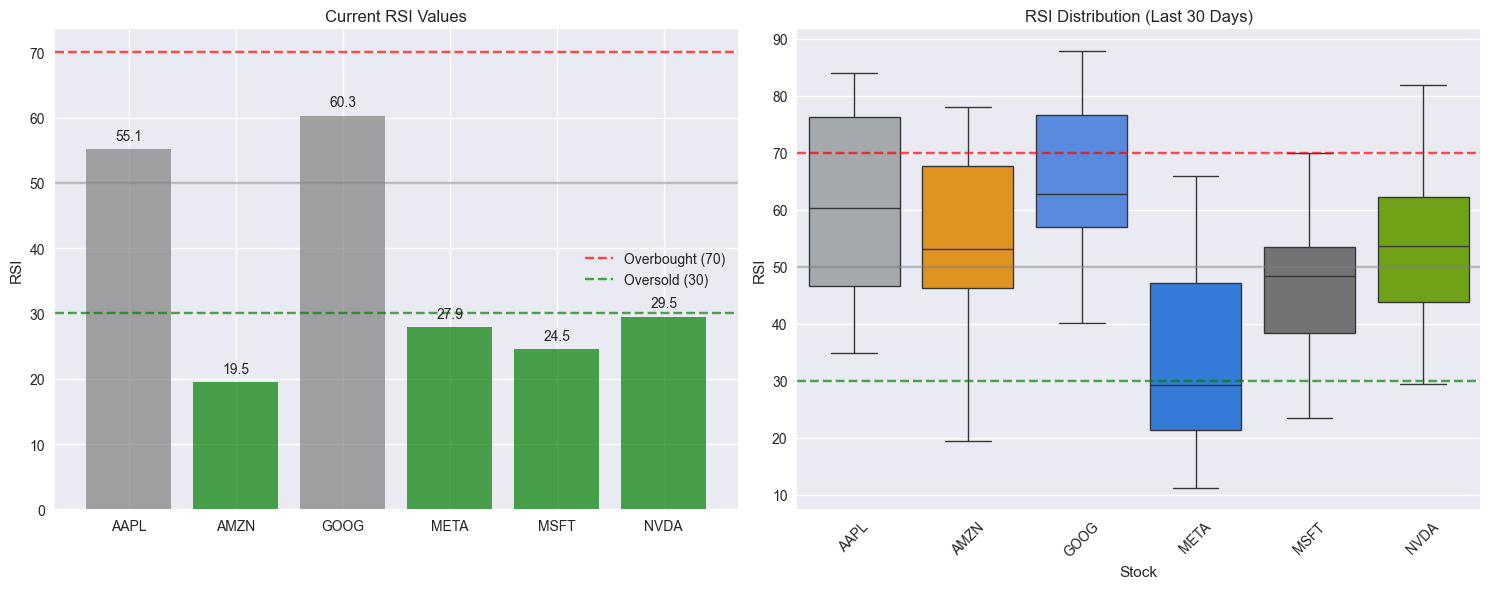


📈 RSI SIGNALS:
   AAPL: RSI 55.1 - NEUTRAL
   AMZN: RSI 19.5 - 🟢 OVERSOLD (Potential Buy)
   GOOG: RSI 60.3 - NEUTRAL
   META: RSI 27.9 - 🟢 OVERSOLD (Potential Buy)
   MSFT: RSI 24.5 - 🟢 OVERSOLD (Potential Buy)
   NVDA: RSI 29.5 - 🟢 OVERSOLD (Potential Buy)


In [6]:
# CELL 4: RSI Comparison Across Stocks
print("📊 RSI COMPARISON ACROSS STOCKS")
print("=" * 50)

if 'RSI' in df.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Current RSI values
    current_rsi = []
    for ticker in TICKERS:
        stock_data = df[df['Stock'] == ticker]
        if not stock_data.empty and 'RSI' in stock_data.columns:
            rsi_value = stock_data['RSI'].iloc[-1]
            current_rsi.append({'Stock': ticker, 'RSI': rsi_value})
    
    rsi_df = pd.DataFrame(current_rsi)
    
    # Bar chart of current RSI
    colors = ['red' if x > 70 else 'green' if x < 30 else 'gray' for x in rsi_df['RSI']]
    bars = ax1.bar(rsi_df['Stock'], rsi_df['RSI'], color=colors, alpha=0.7)
    ax1.axhline(70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
    ax1.axhline(30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
    ax1.axhline(50, color='gray', linestyle='-', alpha=0.5)
    ax1.set_title('Current RSI Values')
    ax1.set_ylabel('RSI')
    ax1.legend()
    
    # Add value labels on bars
    for bar, value in zip(bars, rsi_df['RSI']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}', ha='center', va='bottom')
    
    # RSI distribution over time (last 30 days)
    ax2.set_title('RSI Distribution (Last 30 Days)')
    rsi_data = []
    for ticker in TICKERS:
        stock_data = df[df['Stock'] == ticker].sort_values('Date').tail(30)
        if not stock_data.empty and 'RSI' in stock_data.columns:
            for rsi in stock_data['RSI']:
                rsi_data.append({'Stock': ticker, 'RSI': rsi})
    
    rsi_dist_df = pd.DataFrame(rsi_data)
    if not rsi_dist_df.empty:
        sns.boxplot(data=rsi_dist_df, x='Stock', y='RSI', ax=ax2, palette=company_colors)
        ax2.axhline(70, color='red', linestyle='--', alpha=0.7)
        ax2.axhline(30, color='green', linestyle='--', alpha=0.7)
        ax2.axhline(50, color='gray', linestyle='-', alpha=0.5)
        ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # RSI signals summary
    print("\n📈 RSI SIGNALS:")
    for _, row in rsi_df.iterrows():
        signal = "NEUTRAL"
        if row['RSI'] > 70:
            signal = "🔴 OVERBOUGHT (Potential Sell)"
        elif row['RSI'] < 30:
            signal = "🟢 OVERSOLD (Potential Buy)"
        print(f"   {row['Stock']}: RSI {row['RSI']:.1f} - {signal}")

📈 MACD COMPARISON ACROSS STOCKS


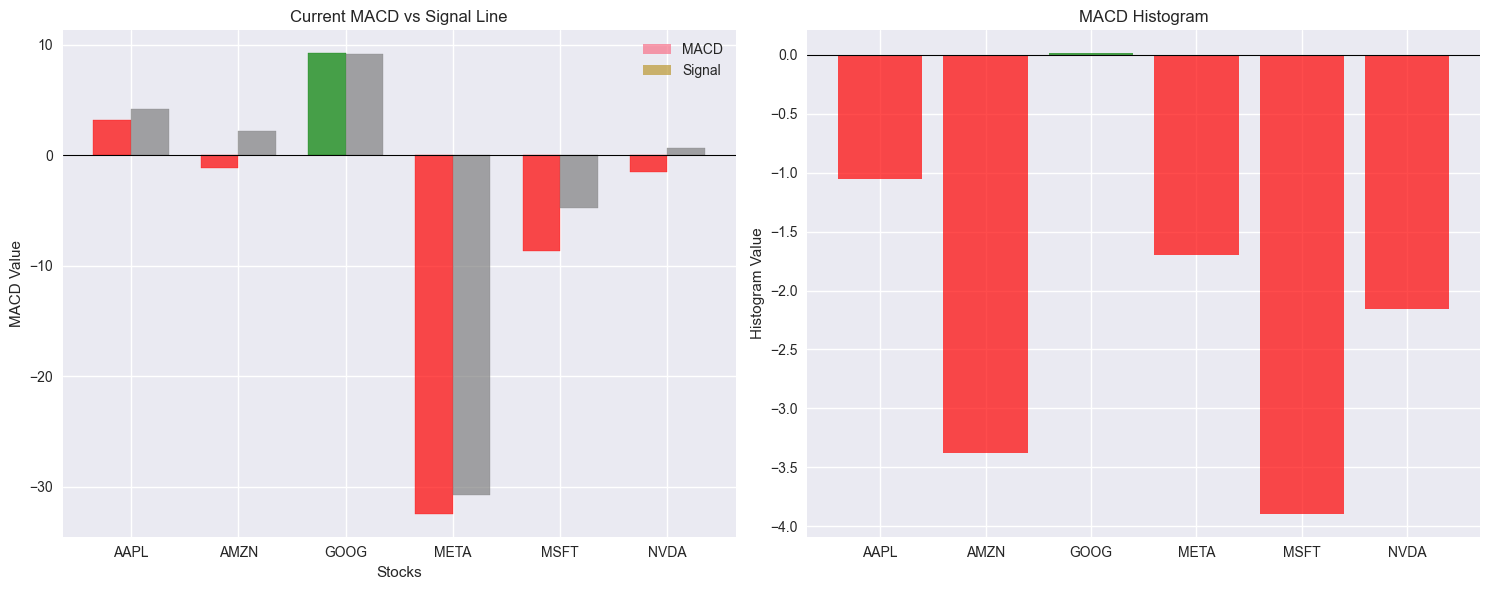


📊 MACD SIGNALS:
   AAPL: 🔴 BEARISH (MACD < Signal) | Histogram: Negative
   AMZN: 🔴 BEARISH (MACD < Signal) | Histogram: Negative
   GOOG: 🟢 BULLISH (MACD > Signal) | Histogram: Positive
   META: 🔴 BEARISH (MACD < Signal) | Histogram: Negative
   MSFT: 🔴 BEARISH (MACD < Signal) | Histogram: Negative
   NVDA: 🔴 BEARISH (MACD < Signal) | Histogram: Negative


In [7]:
# CELL 5: MACD Comparison Across Stocks
print("📈 MACD COMPARISON ACROSS STOCKS")
print("=" * 50)

if all(col in df.columns for col in ['MACD', 'MACD_Signal']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Current MACD values
    current_macd = []
    for ticker in TICKERS:
        stock_data = df[df['Stock'] == ticker]
        if not stock_data.empty:
            latest = stock_data.iloc[-1]
            current_macd.append({
                'Stock': ticker,
                'MACD': latest['MACD'],
                'MACD_Signal': latest['MACD_Signal'],
                'MACD_Histogram': latest.get('MACD_Histogram', 0)
            })
    
    macd_df = pd.DataFrame(current_macd)
    
    # MACD vs Signal Line
    x_pos = np.arange(len(TICKERS))
    width = 0.35
    
    bars1 = ax1.bar(x_pos - width/2, macd_df['MACD'], width, label='MACD', alpha=0.7)
    bars2 = ax1.bar(x_pos + width/2, macd_df['MACD_Signal'], width, label='Signal', alpha=0.7)
    
    ax1.set_xlabel('Stocks')
    ax1.set_ylabel('MACD Value')
    ax1.set_title('Current MACD vs Signal Line')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(TICKERS)
    ax1.legend()
    ax1.axhline(0, color='black', linewidth=0.8)
    
    # Color bars based on bullish/bearish
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        color = 'green' if bar1.get_height() > bar2.get_height() else 'red'
        bar1.set_color(color)
        bar2.set_color('gray')
    
    # MACD Histogram
    colors = ['green' if x > 0 else 'red' for x in macd_df['MACD_Histogram']]
    ax2.bar(macd_df['Stock'], macd_df['MACD_Histogram'], color=colors, alpha=0.7)
    ax2.set_title('MACD Histogram')
    ax2.set_ylabel('Histogram Value')
    ax2.axhline(0, color='black', linewidth=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # MACD signals summary
    print("\n📊 MACD SIGNALS:")
    for _, row in macd_df.iterrows():
        if row['MACD'] > row['MACD_Signal']:
            signal = "🟢 BULLISH (MACD > Signal)"
        else:
            signal = "🔴 BEARISH (MACD < Signal)"
        
        histogram_signal = "Positive" if row['MACD_Histogram'] > 0 else "Negative"
        print(f"   {row['Stock']}: {signal} | Histogram: {histogram_signal}")

📊 MOVING AVERAGES COMPARISON
Available Moving Averages: ['MA_20', 'MA_50']


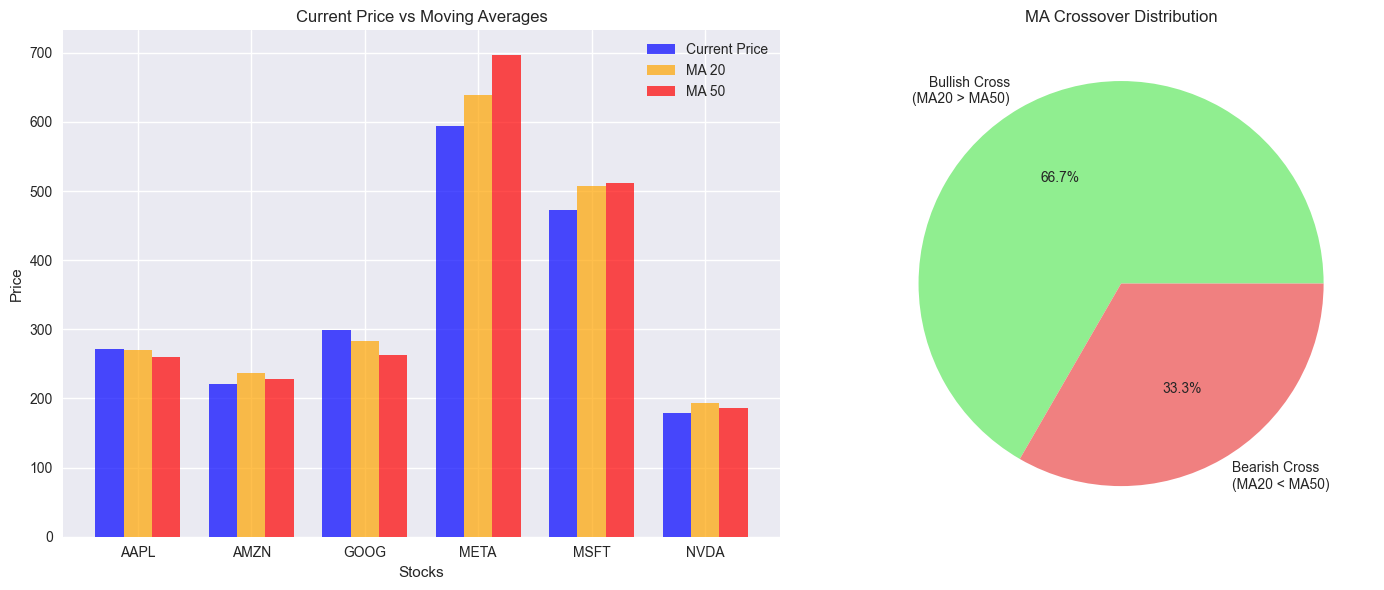


📈 MOVING AVERAGE SIGNALS:
   AAPL: 🟢 BULLISH | Price: Above MA20, Above MA50
   AMZN: 🟢 BULLISH | Price: Below MA20, Below MA50
   GOOG: 🟢 BULLISH | Price: Above MA20, Above MA50
   META: 🔴 BEARISH | Price: Below MA20, Below MA50
   MSFT: 🔴 BEARISH | Price: Below MA20, Below MA50
   NVDA: 🟢 BULLISH | Price: Below MA20, Below MA50


In [8]:
# CELL 6: Moving Averages Comparison
print("📊 MOVING AVERAGES COMPARISON")
print("=" * 50)

# Check which moving averages are available
ma_columns = [col for col in df.columns if col.startswith('MA_')]
print(f"Available Moving Averages: {ma_columns}")

if len(ma_columns) >= 2:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Current price vs moving averages
    current_ma_data = []
    for ticker in TICKERS:
        stock_data = df[df['Stock'] == ticker]
        if not stock_data.empty:
            latest = stock_data.iloc[-1]
            row_data = {'Stock': ticker, 'Price': latest['Close']}
            for ma in ma_columns[:2]:  # Use first two MAs
                if ma in latest:
                    row_data[ma] = latest[ma]
            current_ma_data.append(row_data)
    
    ma_df = pd.DataFrame(current_ma_data)
    
    # Price vs MA comparison
    if 'MA_20' in ma_df.columns and 'MA_50' in ma_df.columns:
        # Calculate price position relative to MAs
        ma_df['Above_MA20'] = ma_df['Price'] > ma_df['MA_20']
        ma_df['Above_MA50'] = ma_df['Price'] > ma_df['MA_50']
        
        # Plot price and MAs
        x_pos = np.arange(len(ma_df))
        width = 0.25
        
        ax1.bar(x_pos - width, ma_df['Price'], width, label='Current Price', color='blue', alpha=0.7)
        ax1.bar(x_pos, ma_df['MA_20'], width, label='MA 20', color='orange', alpha=0.7)
        ax1.bar(x_pos + width, ma_df['MA_50'], width, label='MA 50', color='red', alpha=0.7)
        
        ax1.set_xlabel('Stocks')
        ax1.set_ylabel('Price')
        ax1.set_title('Current Price vs Moving Averages')
        ax1.set_xticks(x_pos)
        ax1.set_xticklabels(ma_df['Stock'])
        ax1.legend()
        
        # MA Crossover signals
        bullish_cross = ma_df[ma_df['MA_20'] > ma_df['MA_50']]['Stock'].tolist()
        bearish_cross = ma_df[ma_df['MA_20'] < ma_df['MA_50']]['Stock'].tolist()
        
        ax2.pie([len(bullish_cross), len(bearish_cross)], 
                labels=['Bullish Cross\n(MA20 > MA50)', 'Bearish Cross\n(MA20 < MA50)'], 
                autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
        ax2.set_title('MA Crossover Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # MA signals summary
    print("\n📈 MOVING AVERAGE SIGNALS:")
    for _, row in ma_df.iterrows():
        if 'MA_20' in row and 'MA_50' in row:
            ma_signal = "🟢 BULLISH" if row['MA_20'] > row['MA_50'] else "🔴 BEARISH"
            price_vs_ma20 = "Above" if row['Price'] > row['MA_20'] else "Below"
            price_vs_ma50 = "Above" if row['Price'] > row['MA_50'] else "Below"
            
            print(f"   {row['Stock']}: {ma_signal} | Price: {price_vs_ma20} MA20, {price_vs_ma50} MA50")

📏 BOLLINGER BANDS POSITION ANALYSIS


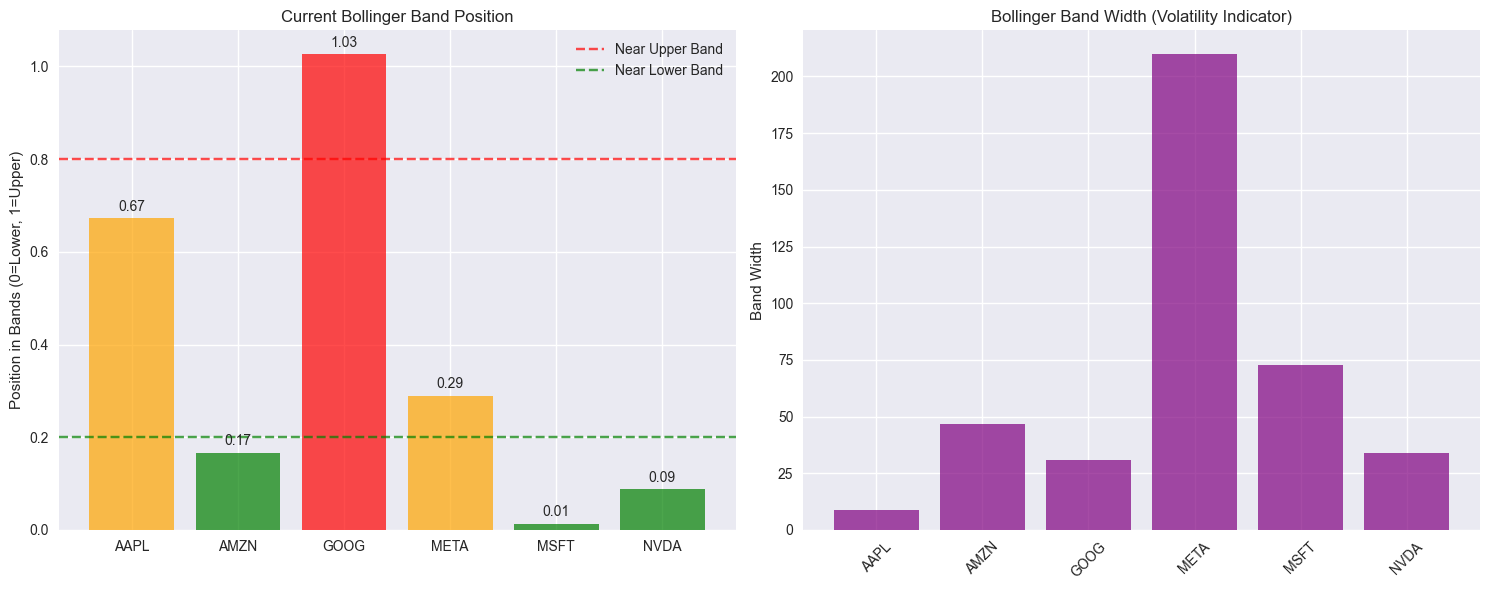


📏 BOLLINGER BAND SIGNALS:
   AAPL: ⚪ WITHIN BANDS (Neutral) | Position: 0.67
   AMZN: 🟢 NEAR LOWER BAND (Potential Support) | Position: 0.17
   GOOG: 🔴 NEAR UPPER BAND (Potential Resistance) | Position: 1.03
   META: ⚪ WITHIN BANDS (Neutral) | Position: 0.29
   MSFT: 🟢 NEAR LOWER BAND (Potential Support) | Position: 0.01
   NVDA: 🟢 NEAR LOWER BAND (Potential Support) | Position: 0.09


In [9]:
# CELL 7: Bollinger Bands Position Analysis
print("📏 BOLLINGER BANDS POSITION ANALYSIS")
print("=" * 50)

if all(col in df.columns for col in ['BB_Upper', 'BB_Lower', 'BB_Middle']):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Current Bollinger Band positions
    bb_data = []
    for ticker in TICKERS:
        stock_data = df[df['Stock'] == ticker]
        if not stock_data.empty:
            latest = stock_data.iloc[-1]
            # Calculate position within bands (0 = at lower band, 1 = at upper band)
            if latest['BB_Upper'] != latest['BB_Lower']:  # Avoid division by zero
                bb_position = (latest['Close'] - latest['BB_Lower']) / (latest['BB_Upper'] - latest['BB_Lower'])
            else:
                bb_position = 0.5
                
            bb_data.append({
                'Stock': ticker,
                'BB_Position': bb_position,
                'Close': latest['Close'],
                'BB_Upper': latest['BB_Upper'],
                'BB_Lower': latest['BB_Lower'],
                'BB_Width': latest.get('BB_Width', latest['BB_Upper'] - latest['BB_Lower'])
            })
    
    bb_df = pd.DataFrame(bb_data)
    
    # Bollinger Band Position
    colors = ['red' if x > 0.8 else 'green' if x < 0.2 else 'orange' for x in bb_df['BB_Position']]
    bars = ax1.bar(bb_df['Stock'], bb_df['BB_Position'], color=colors, alpha=0.7)
    ax1.axhline(0.8, color='red', linestyle='--', alpha=0.7, label='Near Upper Band')
    ax1.axhline(0.2, color='green', linestyle='--', alpha=0.7, label='Near Lower Band')
    ax1.set_ylabel('Position in Bands (0=Lower, 1=Upper)')
    ax1.set_title('Current Bollinger Band Position')
    ax1.legend()
    
    # Add value labels
    for bar, value in zip(bars, bb_df['BB_Position']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.2f}', ha='center', va='bottom')
    
    # Band Width Comparison (Volatility)
    ax2.bar(bb_df['Stock'], bb_df['BB_Width'], color='purple', alpha=0.7)
    ax2.set_ylabel('Band Width')
    ax2.set_title('Bollinger Band Width (Volatility Indicator)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Bollinger Band signals
    print("\n📏 BOLLINGER BAND SIGNALS:")
    for _, row in bb_df.iterrows():
        if row['BB_Position'] > 0.8:
            signal = "🔴 NEAR UPPER BAND (Potential Resistance)"
        elif row['BB_Position'] < 0.2:
            signal = "🟢 NEAR LOWER BAND (Potential Support)"
        else:
            signal = "⚪ WITHIN BANDS (Neutral)"
        
        print(f"   {row['Stock']}: {signal} | Position: {row['BB_Position']:.2f}")

📊 VOLUME ANALYSIS COMPARISON


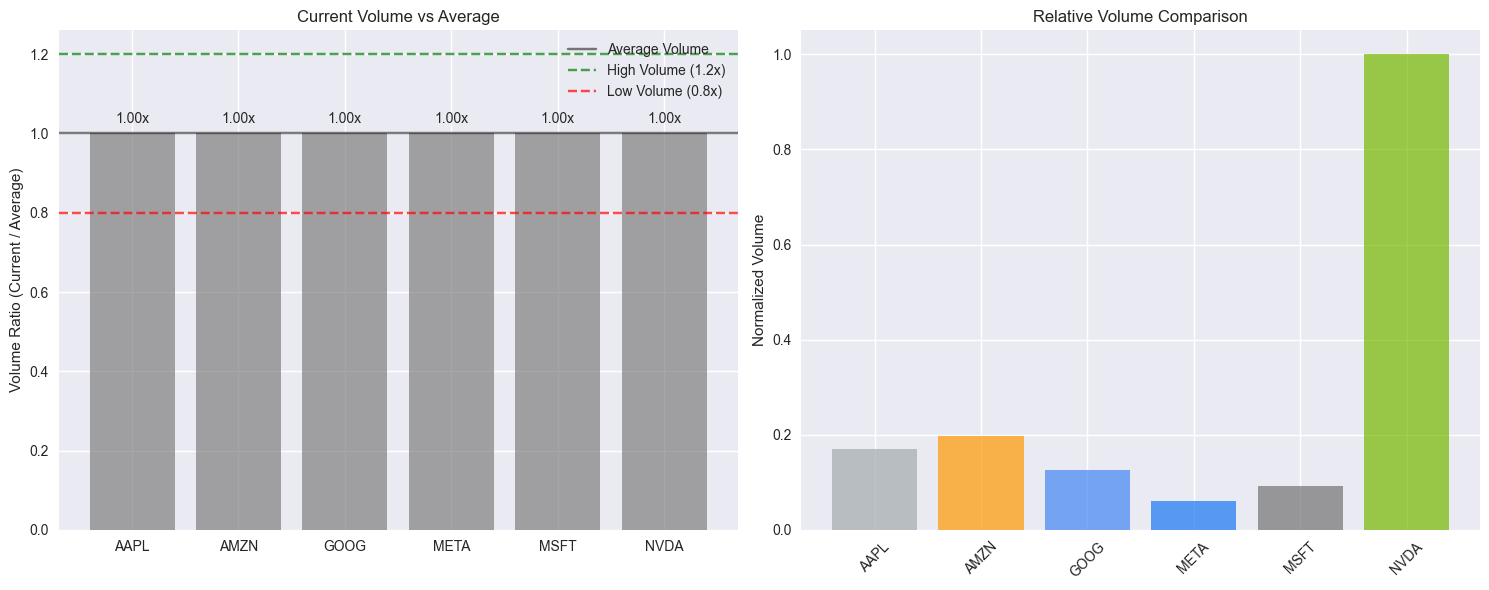


📊 VOLUME SIGNALS:
   AAPL: ⚪ AVERAGE VOLUME | Volume: 1.00x average
   AMZN: ⚪ AVERAGE VOLUME | Volume: 1.00x average
   GOOG: ⚪ AVERAGE VOLUME | Volume: 1.00x average
   META: ⚪ AVERAGE VOLUME | Volume: 1.00x average
   MSFT: ⚪ AVERAGE VOLUME | Volume: 1.00x average
   NVDA: ⚪ AVERAGE VOLUME | Volume: 1.00x average


In [10]:
# CELL 8: Volume Analysis Comparison
print("📊 VOLUME ANALYSIS COMPARISON")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Current volume ratios
volume_data = []
for ticker in TICKERS:
    stock_data = df[df['Stock'] == ticker]
    if not stock_data.empty:
        latest = stock_data.iloc[-1]
        volume_ratio = latest.get('Volume_Ratio', 1.0)
        volume_data.append({
            'Stock': ticker,
            'Volume_Ratio': volume_ratio,
            'Current_Volume': latest['Volume'],
            'Avg_Volume': latest.get('Volume_MA', latest['Volume'])
        })

volume_df = pd.DataFrame(volume_data)

# Volume ratio comparison
colors = ['green' if x > 1.2 else 'red' if x < 0.8 else 'gray' for x in volume_df['Volume_Ratio']]
bars = ax1.bar(volume_df['Stock'], volume_df['Volume_Ratio'], color=colors, alpha=0.7)
ax1.axhline(1.0, color='black', linestyle='-', alpha=0.5, label='Average Volume')
ax1.axhline(1.2, color='green', linestyle='--', alpha=0.7, label='High Volume (1.2x)')
ax1.axhline(0.8, color='red', linestyle='--', alpha=0.7, label='Low Volume (0.8x)')
ax1.set_ylabel('Volume Ratio (Current / Average)')
ax1.set_title('Current Volume vs Average')
ax1.legend()

# Add value labels
for bar, value in zip(bars, volume_df['Volume_Ratio']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{value:.2f}x', ha='center', va='bottom')

# Volume comparison (normalized)
volume_df['Normalized_Volume'] = volume_df['Current_Volume'] / volume_df['Current_Volume'].max()
ax2.bar(volume_df['Stock'], volume_df['Normalized_Volume'], 
        color=[company_colors[t] for t in volume_df['Stock']], alpha=0.7)
ax2.set_ylabel('Normalized Volume')
ax2.set_title('Relative Volume Comparison')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Volume signals
print("\n📊 VOLUME SIGNALS:")
for _, row in volume_df.iterrows():
    if row['Volume_Ratio'] > 1.2:
        signal = "🟢 HIGH VOLUME (Strong interest)"
    elif row['Volume_Ratio'] < 0.8:
        signal = "🔴 LOW VOLUME (Weak interest)"
    else:
        signal = "⚪ AVERAGE VOLUME"
    
    print(f"   {row['Stock']}: {signal} | Volume: {row['Volume_Ratio']:.2f}x average")

🎯 COMBINED TECHNICAL SCORE


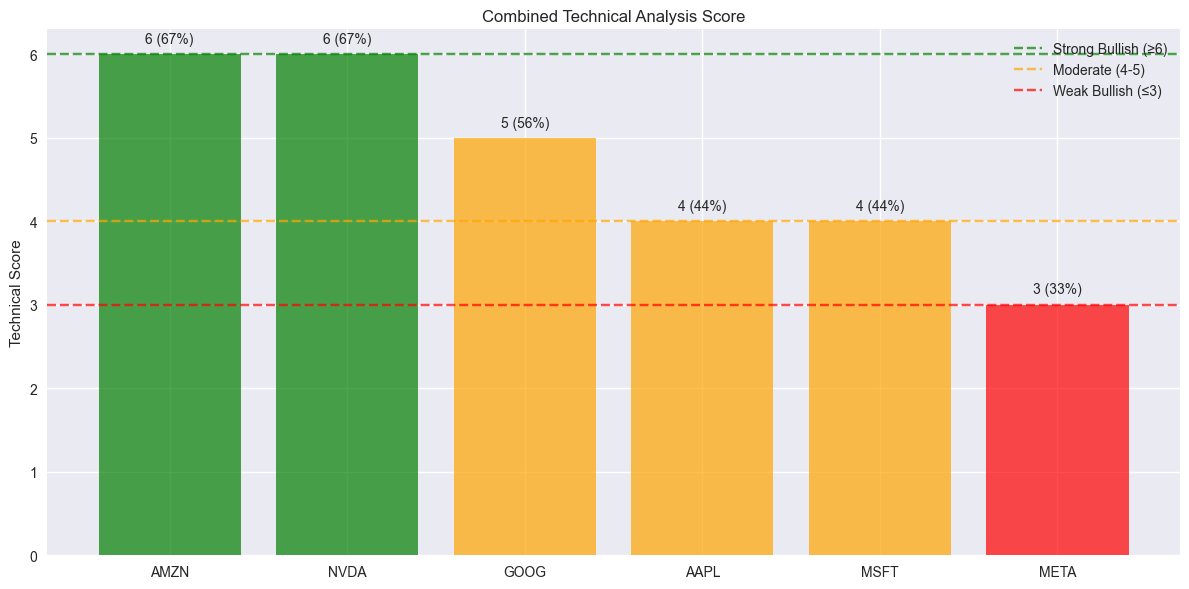


🏆 TECHNICAL SCORES SUMMARY:


,Stock,Technical_Score,Score_Percentage,Signals
1,AMZN,6,66.666667,RSI Oversold (+2) | MACD Bearish (0) | MA Bull...
5,NVDA,6,66.666667,RSI Oversold (+2) | MACD Bearish (0) | MA Bull...
2,GOOG,5,55.555556,RSI Neutral (+1) | MACD Bullish (+2) | MA Bull...
0,AAPL,4,44.444444,RSI Neutral (+1) | MACD Bearish (0) | MA Bulli...
4,MSFT,4,44.444444,RSI Oversold (+2) | MACD Bearish (0) | MA Bear...
3,META,3,33.333333,RSI Oversold (+2) | MACD Bearish (0) | MA Bear...



💡 RECOMMENDATIONS:
   AMZN: 🟢 STRONG BULLISH - Consider buying (Score: 6/9)
   NVDA: 🟢 STRONG BULLISH - Consider buying (Score: 6/9)
   GOOG: 🟡 MODERATE - Watch for entry (Score: 5/9)
   AAPL: 🟡 MODERATE - Watch for entry (Score: 4/9)
   MSFT: 🟡 MODERATE - Watch for entry (Score: 4/9)
   META: 🔴 WEAK - Consider avoiding (Score: 3/9)


In [11]:
# CELL 9: Combined Technical Score
print("🎯 COMBINED TECHNICAL SCORE")
print("=" * 50)

# Calculate a simple technical score for each stock
technical_scores = []

for ticker in TICKERS:
    stock_data = df[df['Stock'] == ticker]
    if stock_data.empty:
        continue
        
    latest = stock_data.iloc[-1]
    score = 0
    signals = []
    
    # RSI Score (0-2 points)
    if 'RSI' in latest:
        if latest['RSI'] < 30:
            score += 2  # Oversold - bullish
            signals.append("RSI Oversold (+2)")
        elif latest['RSI'] > 70:
            score += 0  # Overbought - bearish
            signals.append("RSI Overbought (0)")
        else:
            score += 1  # Neutral
            signals.append("RSI Neutral (+1)")
    
    # MACD Score (0-2 points)
    if all(col in latest for col in ['MACD', 'MACD_Signal']):
        if latest['MACD'] > latest['MACD_Signal']:
            score += 2  # Bullish crossover
            signals.append("MACD Bullish (+2)")
        else:
            score += 0  # Bearish
            signals.append("MACD Bearish (0)")
    
    # Moving Average Score (0-2 points)
    if all(col in latest for col in ['MA_20', 'MA_50']):
        if latest['MA_20'] > latest['MA_50']:
            score += 2  # Bullish alignment
            signals.append("MA Bullish (+2)")
        else:
            score += 0  # Bearish alignment
            signals.append("MA Bearish (0)")
    
    # Bollinger Band Score (0-2 points)
    if all(col in latest for col in ['BB_Upper', 'BB_Lower']):
        bb_position = (latest['Close'] - latest['BB_Lower']) / (latest['BB_Upper'] - latest['BB_Lower'])
        if bb_position < 0.2:
            score += 2  # Near lower band - potential bounce
            signals.append("BB Near Support (+2)")
        elif bb_position > 0.8:
            score += 0  # Near upper band - potential pullback
            signals.append("BB Near Resistance (0)")
        else:
            score += 1  # Neutral
            signals.append("BB Neutral (+1)")
    
    # Volume Score (0-1 point)
    if 'Volume_Ratio' in latest:
        if latest['Volume_Ratio'] > 1.2:
            score += 1  # High volume confirmation
            signals.append("High Volume (+1)")
        else:
            signals.append("Normal Volume (0)")
    
    technical_scores.append({
        'Stock': ticker,
        'Technical_Score': score,
        'Max_Possible_Score': 9,  # RSI(2) + MACD(2) + MA(2) + BB(2) + Volume(1)
        'Score_Percentage': (score / 9) * 100,
        'Signals': ' | '.join(signals)
    })

scores_df = pd.DataFrame(technical_scores).sort_values('Technical_Score', ascending=False)

# Plot technical scores
plt.figure(figsize=(12, 6))
colors = ['green' if x >= 6 else 'orange' if x >= 4 else 'red' for x in scores_df['Technical_Score']]
bars = plt.bar(scores_df['Stock'], scores_df['Technical_Score'], color=colors, alpha=0.7)

plt.axhline(6, color='green', linestyle='--', alpha=0.7, label='Strong Bullish (≥6)')
plt.axhline(4, color='orange', linestyle='--', alpha=0.7, label='Moderate (4-5)')
plt.axhline(3, color='red', linestyle='--', alpha=0.7, label='Weak Bullish (≤3)')

plt.ylabel('Technical Score')
plt.title('Combined Technical Analysis Score')
plt.legend()

# Add value labels
for bar, score, percentage in zip(bars, scores_df['Technical_Score'], scores_df['Score_Percentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             f'{score} ({percentage:.0f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Display scores table
print("\n🏆 TECHNICAL SCORES SUMMARY:")
display(scores_df[['Stock', 'Technical_Score', 'Score_Percentage', 'Signals']])

# Recommendations
print("\n💡 RECOMMENDATIONS:")
for _, row in scores_df.iterrows():
    if row['Technical_Score'] >= 6:
        recommendation = "🟢 STRONG BULLISH - Consider buying"
    elif row['Technical_Score'] >= 4:
        recommendation = "🟡 MODERATE - Watch for entry"
    else:
        recommendation = "🔴 WEAK - Consider avoiding"
    
    print(f"   {row['Stock']}: {recommendation} (Score: {row['Technical_Score']}/9)")